# Tarea 6.1 Discretizacion de variables

In [1]:
import numpy as np
import pandas as pd

* Leer la base de datos `edades.csv`

In [2]:
df_edades = pd.read_csv('edades.csv')

* Discretizar los datos en 10 intervalos iguales. ¿Cuántas personas forman parte de cada intervalo? ¿Cuál es este intervalo?

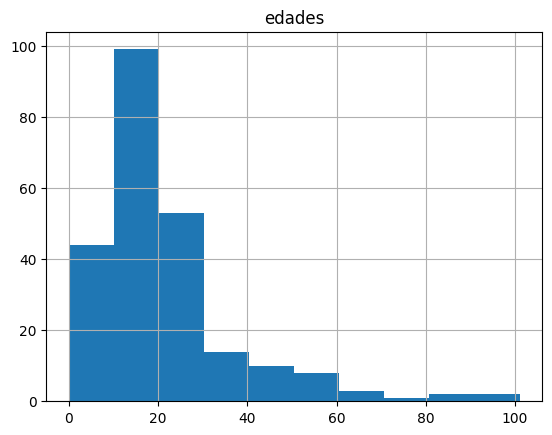

In [5]:
plots = df_edades.hist(bins = 10)

In [6]:
#@title Ancho constante
intervalo=(df_edades['edades'].max()-df_edades['edades'].min())/10
intervalo

10.1

In [9]:
limites=np.linspace(df_edades['edades'].min(),df_edades['edades'].max(),10+1)
limites

array([  0. ,  10.1,  20.2,  30.3,  40.4,  50.5,  60.6,  70.7,  80.8,
        90.9, 101. ])

In [10]:
df_edades['edades_agrupadas']=pd.cut(df_edades['edades'],limites,include_lowest=True)
df_edades.head()

,edades,edades_agrupadas
0,0,"(-0.001, 10.1]"
1,0,"(-0.001, 10.1]"
2,1,"(-0.001, 10.1]"
3,1,"(-0.001, 10.1]"
4,1,"(-0.001, 10.1]"


<Axes: >

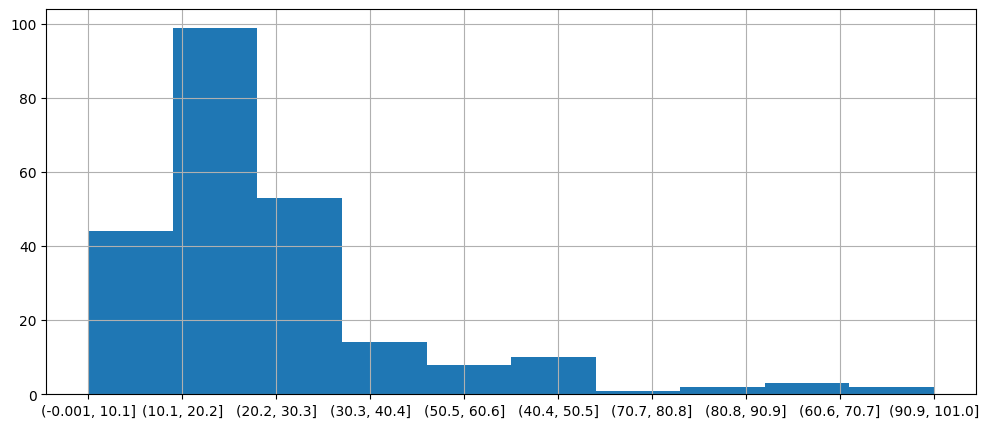

In [12]:
df_edades['edades_agrupadas'].astype('string').hist(figsize=(12,5),bins = 10)

In [14]:
df_edades['edades_agrupadas'].value_counts()

edades_agrupadas
(10.1, 20.2]      99
(20.2, 30.3]      53
(-0.001, 10.1]    44
(30.3, 40.4]      14
(40.4, 50.5]      10
(50.5, 60.6]       8
(60.6, 70.7]       3
(80.8, 90.9]       2
(90.9, 101.0]      2
(70.7, 80.8]       1
Name: count, dtype: int64

El intervalo es de 10.1 y la distribución es muy similar a la que nos dá el histograma por defecto con los 10 bines


* Discretizar los datos en edades de 10 en 10. ¿Cuántas personas forman parte de cada intervalo?

<Axes: >

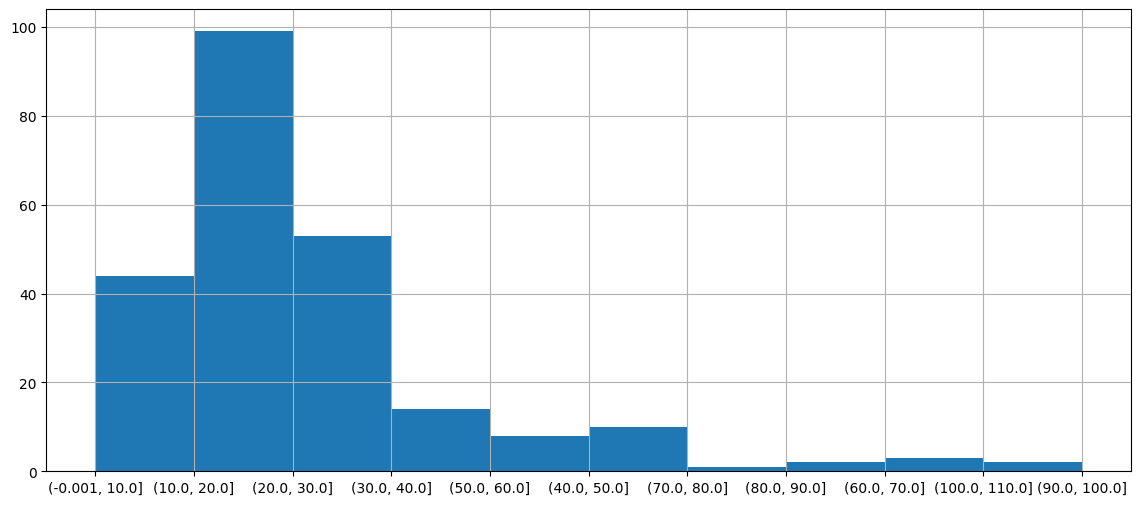

In [17]:

df_edades['edades10']=pd.cut(df_edades['edades'],np.arange(0, 120, 10),include_lowest=True)
df_edades['edades10'].astype('string').hist(figsize=(14,6))

In [19]:
df_edades['edades10'].value_counts()

edades10
(10.0, 20.0]      99
(20.0, 30.0]      53
(-0.001, 10.0]    44
(30.0, 40.0]      14
(40.0, 50.0]      10
(50.0, 60.0]       8
(60.0, 70.0]       3
(80.0, 90.0]       2
(70.0, 80.0]       1
(90.0, 100.0]      1
(100.0, 110.0]     1
Name: count, dtype: int64

* Discretizar los datos y nombrar los intervalos de acuerdo a la siguiente tabla:

Nombre del rango|Rango
------------------|:--------:
bebé|0-2
niño|3-11
adolecente|12-17
joven|18-25
adulto joven|26-39
adulto maduro|40-59
adulto mayor |60 en adelante

Para nombrar los intervalos use el argumento `labels` de la función `cut`

In [25]:
labels = ['bebé', 'niño', 'adolecente', 'joven', 'adulto joven', 'adulto maduro', 'adulto mayor']
limites = [0, 2, 11, 17, 25, 39, 59, np.inf]
df_edades['NombreRango']=pd.cut(df_edades['edades'],bins=limites, labels =labels,include_lowest=True)



* Mostrar un histograma de esta última discretización (¿Cuántas personas forman parte de cada grupo?).

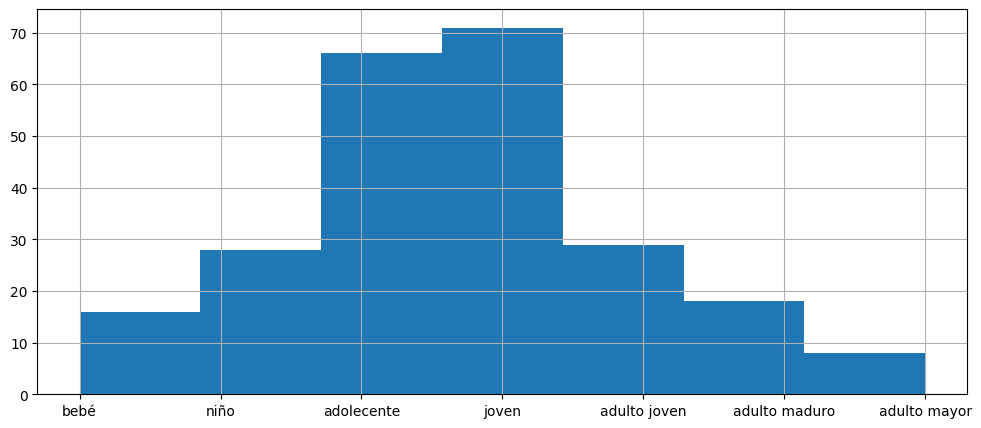

In [28]:
plots = df_edades['NombreRango'].hist(figsize=(12,5),bins = 7)

In [27]:
df_edades['NombreRango'].value_counts()

NombreRango
joven            71
adolecente       66
adulto joven     29
niño             28
adulto maduro    18
bebé             16
adulto mayor      8
Name: count, dtype: int64

# Segunda Parte Vol Pot

* Leer el archivo llamado `Vol-Pot.csv`

In [29]:
df_vol_pot = pd.read_csv('Vol-Pot.csv')


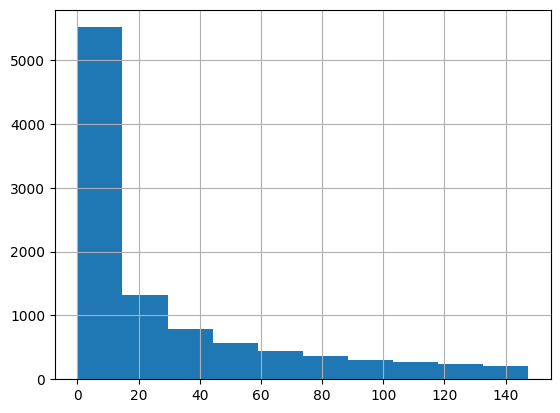

In [32]:
plot = df_vol_pot['Potencia'].hist()

* Discretizar la columna de `Potencia` en 10 binas de forma que el intervalo crezca de forma exponencial:
```python
bins=10
intervalo=[np.exp(A*i)-B for i in range(bins+1)]
```
(Encontrar `A` y `B` de forma que abarque el rango de la columna `Potencia`).

<Axes: >

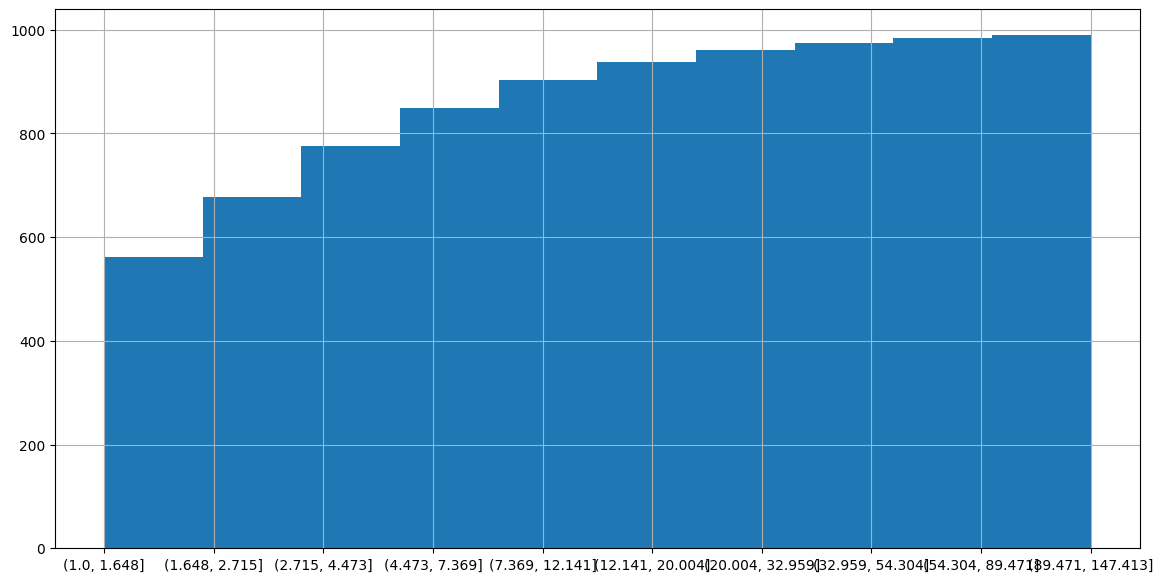

In [33]:
m = df_vol_pot['Potencia'].min()
M = df_vol_pot['Potencia'].max()
bins = 10
A = np.log(M - m)/bins
B = m/(np.exp(A)-1)

# Calcular los intervalos exponenciales
intervalos = [np.exp(A*i)-B for i in range(bins+1)]

# Discretizar la columna 'Potencia' utilizando los intervalos exponenciales
df_vol_pot['Rango de potencia'] = pd.cut(df_vol_pot['Potencia'], bins=intervalos)
df_vol_pot['Rango de potencia'].astype('string').hist(figsize=(14,7))


* ¿Cuántos datos se agrupan en cada intervalo para la columna de `Potencia` y cuántos para la columna de `Volumen`?

In [34]:
df_vol_pot['Rango de potencia'].value_counts()

Rango de potencia
(89.471, 147.413]    990
(54.304, 89.471]     985
(32.959, 54.304]     975
(20.004, 32.959]     961
(12.141, 20.004]     937
(7.369, 12.141]      903
(4.473, 7.369]       849
(2.715, 4.473]       775
(1.648, 2.715]       677
(1.0, 1.648]         561
Name: count, dtype: int64